In [61]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [62]:
player_stats = pd.read_excel('players_stats.xlsx')
players = pd.read_excel('nba_players.xlsx')
teams = pd.read_excel('nba_teams.xlsx')

In [95]:
df_array, df_array_stats, df_array_avg_stats, counter = [], [], [], 0
team_wins = [43, 51, 44, 43, 46, 44, 52, 48, 23, 53, 20, 25, 42, 33, 56, 53, 51, 46, 36, 37, 24, 22, 51, 64, 27, 30, 34, 48, 49, 35]
for i in teams.iterrows():
    team_name = i[1][1]
    team_id = i[1][0]
    players2 = players[['player_id', 'firstname', 'lastname', 'club_id']]
    team = pd.merge(players2, teams, left_on='club_id', right_on='id', how='inner')
    team = team.loc[team['name'] == team_name, ['player_id', 'firstname', 'lastname', 'club_id', 'name']].rename(columns={'name': 'team_name'})
    team_stats = pd.merge(team, player_stats, on='player_id', how='inner')
    team_stats = team_stats.loc[team_stats['games'] >= 10]
    df_array.append(team)
    df_array_stats.append(team_stats)
    max_seconds = 60*48
    values_array = [0 for i in range(team_stats.shape[1])]
    for index, row in team_stats.iterrows():
        time_format = '%H:%M:%S.%f'
        time_str = row['min']
        if '.' not in time_str: time_format = '%H:%M:%S'
        t = datetime.datetime.strptime(time_str, time_format)
        seconds = t.hour * 3600 + t.minute * 60 + t.second + t.microsecond / 1e6
        wage = seconds/max_seconds*row['games']
        for iterator, key in enumerate(team_stats):
            if iterator > 6:
                values_array[iterator] += float(row[key])
    values_array = [value/team_stats.shape[0] for value in values_array]
    values_array = values_array[7:]
    values_array.append(team_wins[counter])
    counter += 1
    df_array_avg_stats.append(values_array)

In [121]:
# teams

In [114]:
del_washington = [['Asante', 'Gist'], ['Montrezl ', 'Harrell '], ['Thomas', 'Bryant'], ['Aaron', 'Holiday'], ['Craig', 'Sword'], ['Alize', 'Johnson'], ['Rui', 'Hachimura'], ['Aubrey', 'Dawkins'], ['Dewan', 'Hernandez'], ['Tremont', 'Waters'],  ['Marques', 'Bolden'],  ['Vernon', 'Carey Jr.'], ['Cassius', 'Winston'], ['Mason', 'Jones'], ['Caleb', 'Homesley'], ['Jordan', 'Schakel'], ['Devontae', 'Shuler'], ['Jaime', 'Echenique'], ['Xavier', 'Rathan-Mayes'], ['Greg', 'Monroe'], ['Ish', 'Smith'], ['Brad', 'Wanamaker'], ['Davis', 'Bertans'], ['Tomas', 'Satoransky'], ['Kentavious', 'Caldwell-Pope'], ['Raul', 'Neto'], ['Spencer', 'Dinwiddie'], ['Austin', 'Hollins'], ['Joel','Ayayi']]
add_washington = [['Xavier', 'Cooks'], ['Johnny','Davis'], ['Taj', 'Gibson'], ['Anthony', 'Gill'], ['Quenton', 'Jackson'], ['Monte', 'Morris'], ['Kendrick', 'Nunn'], ['Delon', 'Wright']]
del_phoenix = [['Frank Kaminsky'], ['Chasson', 'Randle'], ['Michael', 'Frazier'], ['Abdel', 'Nader'], ['Paris', 'Bass'], ['Justin', 'Jackson'], ['Vitto', 'Brown'], ['Mikal', 'Bridges'], ['Aaron', 'Holiday'], ['Chandler', 'Hutchison'], ['Emanuel', 'Terry'], ['Nate', 'Mason'], ['Cameron', 'Johnson'], ['Zach', 'Hankins'], ['Kyle', 'Alexander'], ['Justin', 'Simon'], ['Jalen', 'Smith'], ['Tyrique', 'Jones'], ['Ty-Shon', 'Alexander'], ['MJ', 'Walker'], ['Gabriel', 'Lundberg'], ['JaVale', 'McGee'], ['Jae', 'Crowder'], ['Elfrid', 'Paython'], ['Dario', 'Saric'], ['Alpha', 'Diallo'], ['Jon Axel', 'Gudmundsson'], ['Trey', 'Kell'], ['Jo', 'Lual-Acuil Jr.'], ['emmanuel', 'Nzekwesi'],['Jaleen', 'Smith']]
add_phoenix = [['Kevin', 'Durant'], ['Darius', 'Bazley'], ['Jock', 'Landale'], ['Damion', 'Lee'], ['Saben', 'Lee'], ['Josh', 'Okogie'], ['Terrance', 'Ross'], ['Ish', 'Wainright'], ['T.J.', 'Warren']]
del_bulls = [['Ersan', 'Ilyasova'],['Stanley', 'Johnson'],['Alfonzo', 'McKinnie'],['Jordan', 'Bell'],['Tony', 'Bradley'],['Troy', 'Brown Jr.'],['Alize', 'Johnson'],['Jerome', 'Robinson'],['Omari', 'Spellman'],['Tyler', 'Cook'],['Jaylen', 'Adams'],['Devon', 'Dotson'],['Simisola', 'Shittu'],['Matt', 'Thomas'],['Daniel', 'Oturu'],['Tyler', 'Bey'],['Mac', 'McClung'],['Ryan', 'Daly'],['Ethan', 'Thompson'],['Malcolm', 'Hill'],['Sterling', 'Manley'],['Troy', 'Baxter Jr.'],['Tristan', 'Thompson']]
add_bulls = [['Andre', 'Drummond'], ['Patrick', 'Beverley'], ['Jones', 'Carlik'], ['Justin','Lewis'], ['Terry', 'Taylor'], ['Dalen', 'Terry']]
del_indiana = [['Justin', 'Anderson'], ['Keifer', 'Sykes'], ['Domantas', 'Sabonis'], ['Caris', 'LeVert'], ['Malcolm', 'Brogdon'], ['Tyrone', 'Wallace'], ['Edmond', 'Sumner'], ['Devin', 'Robinson'], ['Torrey', 'Craig'], ['Terry', 'Henderson'], ['Amida', 'Brimah'], ['Goga', 'Bitadze'], ['Kelan', 'Martin'], ['BJ', 'Johnson'], ['Bennie', 'Boatwright'], ['Reggie', 'Perry'], ['Jordan', 'Bone'], ['Ahmad', 'Caver'], ['Cassius', 'Stanley'], ['Nate', 'Hinton'], ['DeJon', 'Jarreau'], ['Duane', 'Washington Jr.'], ['Terry', 'Taylor'], ['Ricky', 'Rubio'], ['Lance', 'Stephenson'], ['Tristan', 'Thompson'], ['Brad', 'Wanamaker'], ['Jeremy', 'Lamb'], ['Justin', 'Holiday'], ['T.J.', 'Warren'], ['T.J.', 'McConnell']]
add_indiana = [['Kendall', 'Brown'], ['George', 'Hill'], ['James', 'Johnson'], ['Bennedict', 'Mathurin'], ['Andrew', 'Nembhard'], ['Aaron', 'Nesmith'], ['Jordan', 'Nwora'], ['Jalen', 'Smith'], ['Daniel', 'Theis']]
del_miami = [['Mychal', 'Mulder'], ['Brandon', 'McCoy'], ['Zylan', 'Cheatham'], ['KZ', 'Okpala'], ['Kyle', 'Guy'], ['Aric', 'Holman'], ['Chris', 'Silva'], ['Marcus', 'Garett'], ['DJ', 'Stewart'], ['Javonte', 'Smart'], ['DeJon', 'Jarreau'], ['RJ', 'Nembhard Jr,'], ['Justin', 'Smith'], ['Micah', 'Potter'], ['Dru', 'Smith'], ['P.J.', 'Tucker'], ['Mario', 'Chalmers'], ['Dewayne', 'Dedmon'], ['Nik', 'Stauskas'], ['Tyson', 'Carter']]
add_miami = [['Kevin', 'Love'], ['Jamal', 'Cain'], ['Nikola', 'Jović'], ['Orlando', 'Robinson'], ['Cody', 'Zeller']]
del_phila = [['Charles', 'Bassey'], ['Charlie', 'Brown'], ['Danny', 'Green'], ['Isaiah', 'Joe'], ['DeAndre', 'Jordan'], ['Paul', 'Millsap'], ['Myles', 'Powell']]
add_phila = [['Dewayne', 'Dedmon'], ['Shake', 'Milton'], ["De'Anthony", 'Melton'], ['Montrezl', 'Harell'], ['Jalen', 'McDaniels'], ['P.J.','Tucker']]
del_knicks = [['Ryan', 'Arcidiacono'], ['Alec', 'Burks'], ['Taj', 'Gibson'], ['Feron', 'Hunt'], ['Nerlens', 'Noel'], ['Cam', 'Reddish'], ['Kemba', 'Walker']]
add_knicks = [['Jalen', 'Brunson'], ['Josh', 'Hart'], ['Isaiah', 'Hartenstein'], ['DaQuan', 'Jeffries'], ['Trevor', 'Keels']]
del_clips = [['Rodney', 'Hood'], ['Luke', 'Kennard'], ['Reggie', 'Jackson']]
add_clips = [['Eric', 'Gordon'], ['Bones', 'Hyland'], ['Mason', 'Plumlee'], ['Russell', 'Westbrook']]

add_del = [[41, del_washington, add_washington, 35], [28, del_phoenix, add_phoenix, 45], [6, del_bulls, add_bulls, 40], [15, del_indiana, add_indiana, 35], [20, del_miami, add_miami, 44], [27, del_phila, add_phila, 54], [24, del_knicks, add_knicks, 47], [16, del_clips, add_clips, 44]]
add_del_id = [[41, [], []], [28, [], []], [6, [], []], [15, [], []], [20, [], []], [27, [], []], [24, [], []], [16, [], []]]
for k in range(len(add_del)):
    for m in range(1, 3):
        for j in add_del[k][m]:
            for i in players.iterrows():
                if i[1]['firstname'] == j[0] and i[1]['lastname'] == j[1]: 
                    add_del_id[k][m].append(int(i[1]['player_id']))

In [122]:
# utworzenie druzyn zlozonych z nowych zawodnikow (nowy sezon)
choosen_club_id = teams.loc[teams['name'].isin(['Washington Wizards', 'Chicago Bulls', 'Indiana Pacers', 'Miami Heat', 'Phoenix Suns', 'Philadelphia 76ers', 'New York Knicks', 'LA Clippers'])]
players_s2 = []
for i in choosen_club_id.iterrows():
    temp_id = i[1]['id']
    players5 = players.loc[players['club_id'] == temp_id]
    for iterator in range(len(add_del_id)):
        if add_del_id[iterator][0] == temp_id: 
            add_del_index = iterator
    players5 = players5[~(players5[['player_id']].isin(add_del_id[add_del_index][1]).all(axis=1))]
    selected_players = players[players['player_id'].isin(add_del_id[add_del_index][2])]
    players5 = pd.concat([players5, selected_players], ignore_index=True)
    del players5['club_id']
    players5 = players5.assign(club_id=temp_id)
    players_s2.append(players5[['player_id', 'firstname', 'lastname', 'club_id']])

In [123]:
len(add_del_id)

8

In [124]:
df_array, df_array_stats, df_array_avg_stats2, counter = [], [], [], 0
for i in range(len(add_del_id)):
    team_name = teams.loc[teams['id']==int(players_s2[i]['club_id'][0])]['name'].iloc[0]
    team_id = int(players_s2[i]['club_id'][0])
    players2 = players_s2[i][['player_id', 'firstname', 'lastname', 'club_id']]
    team = pd.merge(players2, teams, left_on='club_id', right_on='id', how='inner')
    team = team.loc[team['name'] == team_name, ['player_id', 'firstname', 'lastname', 'club_id', 'name']].rename(columns={'name': 'team_name'})
    team_stats = pd.merge(team, player_stats, on='player_id', how='inner')
    team_stats = team_stats.loc[team_stats['games'] >= 10]
    df_array.append(team)
    df_array_stats.append(team_stats)
    max_seconds = 60*48
    values_array = [0 for i in range(team_stats.shape[1])]
    for index, row in team_stats.iterrows():
        time_format = '%H:%M:%S.%f'
        time_str = row['min']
        if '.' not in time_str: time_format = '%H:%M:%S'
        t = datetime.datetime.strptime(time_str, time_format)
        seconds = t.hour * 3600 + t.minute * 60 + t.second + t.microsecond / 1e6
        wage = seconds/max_seconds*row['games']
        for iterator, key in enumerate(team_stats):
            if iterator > 6:
                values_array[iterator] += float(row[key])
    values_array = [value/team_stats.shape[0] for value in values_array]
    values_array = values_array[7:]
    wins = [x[3] for x in add_del if team_id == x[0]]
    values_array.append(wins[0])
    counter += 1
    df_array_avg_stats2.append(values_array)

In [125]:
df_to_model = pd.DataFrame(df_array_avg_stats, columns=['points', 'fgm', 'fga','fgp', 'ftm', 'fta', 'ftp', 'tpm', 'tpa', 'tpp', 'offReb', 'defReb', 'totReb', 'assits', 'pFouls', 'steals', 'turnovers', 'blocks', 'plusMinus', 'ilosc_zwyciestw'])
df_to_model2 = pd.DataFrame(df_array_avg_stats2, columns=['points', 'fgm', 'fga','fgp', 'ftm', 'fta', 'ftp', 'tpm', 'tpa', 'tpp', 'offReb', 'defReb', 'totReb', 'assits', 'pFouls', 'steals', 'turnovers', 'blocks', 'plusMinus', 'ilosc_zwyciestw'])

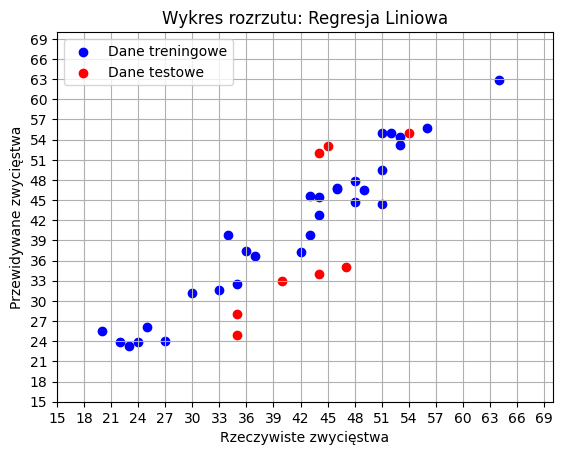

Średni błąd absolutny (MAE): 7.875
Wartość R²: -1.0392857142857141
Błąd średniokwadratowy (MSE): 71.375


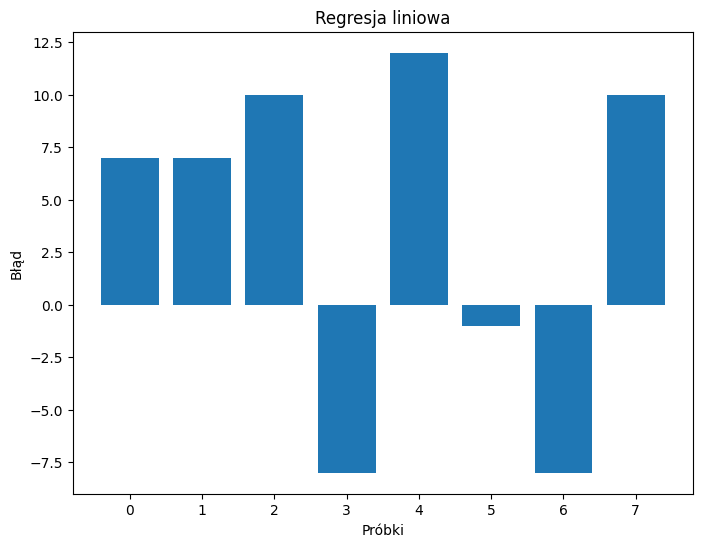

In [126]:
# Podział danych na cechy (atrybuty) i etykiety (ilość zwycięstw)
X = df_to_model.drop('ilosc_zwyciestw', axis=1)  # Przykład: zastosowano wszystkie atrybuty poza 'ilosc_zwyciestw'
y = df_to_model['ilosc_zwyciestw']  # Przykład: 'ilosc_zwyciestw' jest etykietą, którą chcesz przewidzieć

X_test = df_to_model2.drop('ilosc_zwyciestw', axis=1)
y_test = df_to_model2['ilosc_zwyciestw']

# Inicjalizacja i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, None, 82)
y_pred = np.round(y_pred).astype(int)
y2 = y_test.to_list()

mse = mean_squared_error(y_test, y_pred)
y2_numpy = np.array(y2)
r2s = r2_score(y2_numpy, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Wykres rozrzutu
plt.scatter(y, model.predict(X), color='blue', label='Dane treningowe')
plt.scatter(y2, y_pred, color='red', label='Dane testowe')

plt.xlabel('Rzeczywiste zwycięstwa')
plt.ylabel('Przewidywane zwycięstwa')
plt.title('Wykres rozrzutu: Regresja Liniowa')
plt.legend()

# Dodanie siatki
plt.grid(True)

plt.xticks(range(15, 71, 3))
plt.yticks(range(15, 71, 3))
plt.xlim(15, 70)
plt.ylim(15, 70)

plt.show()
print("Średni błąd absolutny (MAE):", mae)
print("Wartość R²:", r2s)
print("Błąd średniokwadratowy (MSE):", mse)

errors = y2_numpy - y_pred
indexes = np.arange(len(y2_numpy))
plt.figure(figsize=(8, 6))
plt.bar(indexes, errors)
plt.xlabel('Próbki')
plt.ylabel('Błąd')
plt.title('Regresja liniowa')
plt.show()

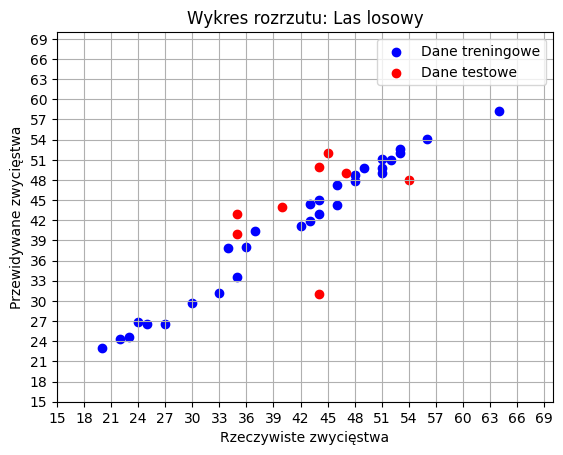

Średni błąd absolutny (MAE): 6.375
Wartość R²: -0.42500000000000004
Błąd średniokwadratowy (MSE): 49.875


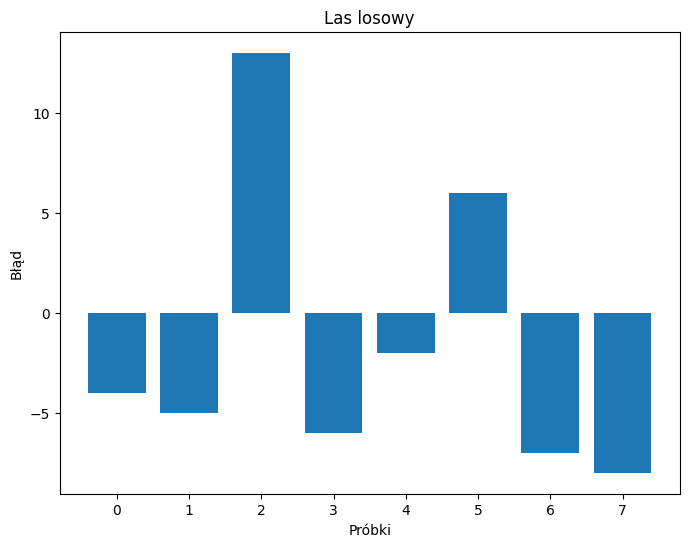

In [127]:
# Podział danych na cechy (atrybuty) i etykiety (ilość zwycięstw)
X = df_to_model.drop('ilosc_zwyciestw', axis=1)  # Przykład: zastosowano wszystkie atrybuty poza 'ilosc_zwyciestw'
y = df_to_model['ilosc_zwyciestw']  # Przykład: 'ilosc_zwyciestw' jest etykietą, którą chcesz przewidzieć

X_test = df_to_model2.drop('ilosc_zwyciestw', axis=1)
y_test = df_to_model2['ilosc_zwyciestw']

# Inicjalizacja i trenowanie modelu regresji liniowej
model = RandomForestRegressor()
model.fit(X, y)

y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, None, 82)
y_pred = np.round(y_pred).astype(int)
y2 = y_test.to_list()

mse = mean_squared_error(y_test, y_pred)
y2_numpy = np.array(y2)
r2s = r2_score(y2_numpy, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Wykres rozrzutu
plt.scatter(y, model.predict(X), color='blue', label='Dane treningowe')
plt.scatter(y2, y_pred, color='red', label='Dane testowe')

plt.xlabel('Rzeczywiste zwycięstwa')
plt.ylabel('Przewidywane zwycięstwa')
plt.title('Wykres rozrzutu: Las losowy')
plt.legend()

# Dodanie siatki
plt.grid(True)

plt.xticks(range(15, 71, 3))
plt.yticks(range(15, 71, 3))
plt.xlim(15, 70)
plt.ylim(15, 70)

plt.show()
print("Średni błąd absolutny (MAE):", mae)
print("Wartość R²:", r2s)
print("Błąd średniokwadratowy (MSE):", mse)
forest_test, forest_pred = y2, y_pred
errors = y2_numpy - y_pred
indexes = np.arange(len(y2_numpy))
plt.figure(figsize=(8, 6))
plt.bar(indexes, errors)
plt.xlabel('Próbki')
plt.ylabel('Błąd')
plt.title('Las losowy')
plt.show()

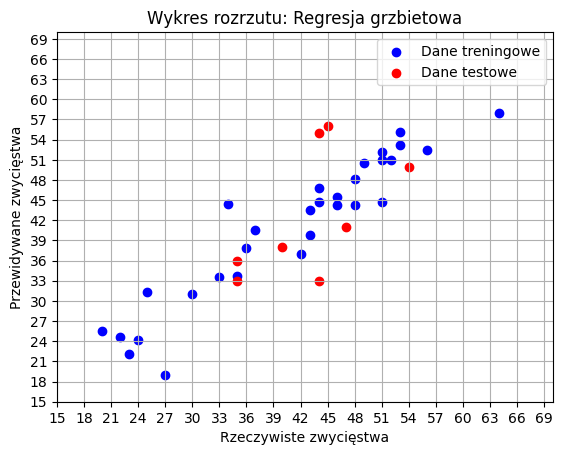

Średni błąd absolutny (MAE): 6.0
Wartość R²: -0.5142857142857142
Błąd średniokwadratowy (MSE): 53.0


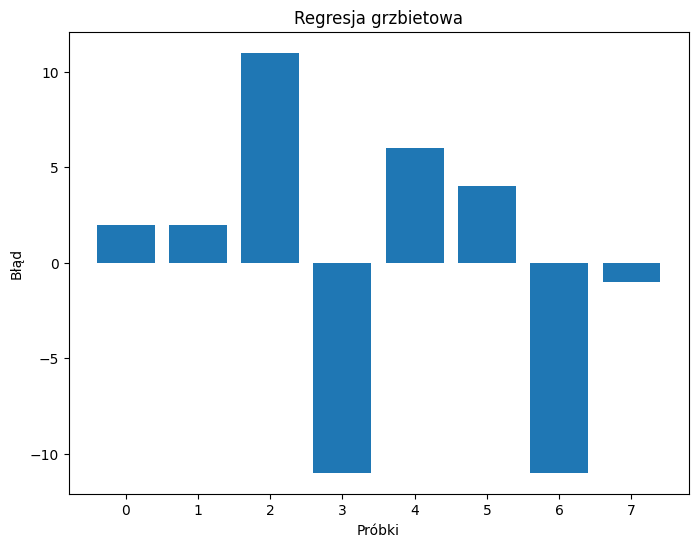

In [128]:
# Podział danych na cechy (atrybuty) i etykiety (ilość zwycięstw)
X = df_to_model.drop('ilosc_zwyciestw', axis=1)  # Przykład: zastosowano wszystkie atrybuty poza 'ilosc_zwyciestw'
y = df_to_model['ilosc_zwyciestw']  # Przykład: 'ilosc_zwyciestw' jest etykietą, którą chcesz przewidzieć

X_test = df_to_model2.drop('ilosc_zwyciestw', axis=1)
y_test = df_to_model2['ilosc_zwyciestw']

# Inicjalizacja i trenowanie modelu regresji liniowej
model = Ridge()
model.fit(X, y)

y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, None, 82)
y_pred = np.round(y_pred).astype(int)
y2 = y_test.to_list()

mse = mean_squared_error(y_test, y_pred)
y2_numpy = np.array(y2)
r2s = r2_score(y2_numpy, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Wykres rozrzutu
plt.scatter(y, model.predict(X), color='blue', label='Dane treningowe')
plt.scatter(y2, y_pred, color='red', label='Dane testowe')

plt.xlabel('Rzeczywiste zwycięstwa')
plt.ylabel('Przewidywane zwycięstwa')
plt.title('Wykres rozrzutu: Regresja grzbietowa')
plt.legend()

# Dodanie siatki
plt.grid(True)

plt.xticks(range(15, 71, 3))
plt.yticks(range(15, 71, 3))
plt.xlim(15, 70)
plt.ylim(15, 70)

plt.show()
ridge_test, ridge_pred = y2, y_pred
print("Średni błąd absolutny (MAE):", mae)
print("Wartość R²:", r2s)
print("Błąd średniokwadratowy (MSE):", mse)
errors = y2_numpy - y_pred
indexes = np.arange(len(y2_numpy))
plt.figure(figsize=(8, 6))
plt.bar(indexes, errors)
plt.xlabel('Próbki')
plt.ylabel('Błąd')
plt.title('Regresja grzbietowa')
plt.show()

In [129]:
average_test = [(ridge_test[i]+forest_test[i])/2 for i in range(5)]
average_pred = [(ridge_pred[i]+forest_pred[i])/2 for i in range(5)]


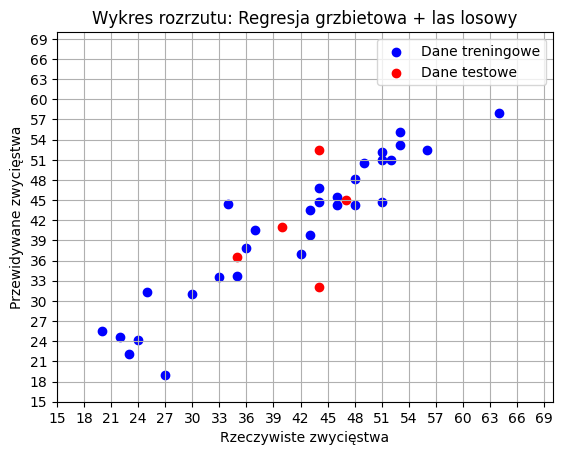

In [130]:
# Wykres rozrzutu
plt.scatter(y, model.predict(X), color='blue', label='Dane treningowe')
plt.scatter(average_test, average_pred, color='red', label='Dane testowe')

plt.xlabel('Rzeczywiste zwycięstwa')
plt.ylabel('Przewidywane zwycięstwa')
plt.title('Wykres rozrzutu: Regresja grzbietowa + las losowy')
plt.legend()

# Dodanie siatki
plt.grid(True)

plt.xticks(range(15, 71, 3))
plt.yticks(range(15, 71, 3))
plt.xlim(15, 70)
plt.ylim(15, 70)

plt.show()

In [131]:
r2t = r2_score(average_test, average_pred)
r2t

-1.5988372093023258